In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/project-DEVesh-and-Chikuda'

/content/drive/MyDrive/project-DEVesh-and-Chikuda


In [3]:
!pwd

/content/drive/MyDrive/project-DEVesh-and-Chikuda


In [10]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("anikannal/solar-power-generation-data")

# print("Path to dataset files:", path)

100%|██████████| 1.90M/1.90M [00:00<00:00, 119MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anikannal/solar-power-generation-data/versions/1


In [11]:
# import os
# import shutil
# destination_path = "/content/drive/MyDrive/project-DEVesh-and-Chikuda"

# # Ensure the destination directory exists
# os.makedirs(destination_path, exist_ok=True)

# # Move the dataset to Google Drive
# shutil.move(path, destination_path)

'/content/drive/MyDrive/project-DEVesh-and-Chikuda/1'

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
gen_1 = pd.read_csv('./1/Plant_1_Generation_Data.csv')
sens_1 = pd.read_csv('./1/Plant_1_Weather_Sensor_Data.csv')
gen_2 = pd.read_csv('./1/Plant_2_Generation_Data.csv')
sens_2 = pd.read_csv('./1/Plant_2_Weather_Sensor_Data.csv')

## preprocessing

In [7]:
df_gen1 = gen_1.copy()
df_sens1 = sens_1.copy()
df_gen2 = gen_2.copy()
df_sens2 = sens_2.copy()
df_gen1['DATE_TIME'] = pd.to_datetime(df_gen1['DATE_TIME'],format = '%d-%m-%Y %H:%M')
df_sens1['DATE_TIME'] = pd.to_datetime(df_sens1['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')
df_gen2['DATE_TIME'] = pd.to_datetime(df_gen2['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')
df_sens2['DATE_TIME'] = pd.to_datetime(df_sens2['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')


df_plant1 = pd.merge(df_gen1.drop(columns = ['PLANT_ID']), df_sens1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

In [8]:
df_plant1.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


In [9]:
# Adding inverter number column to the dataframe
sensor_keys = df_plant1['SOURCE_KEY'].unique()
sensor_numbers = dict(zip(sensor_keys, range(1, len(sensor_keys) + 1)))

# Add SENSOR_NUM column using map
df_plant1['SENSOR_NUM'] = df_plant1['SOURCE_KEY'].map(sensor_numbers)

# Add SENSOR_NAME column
df_plant1['SENSOR_NAME'] = df_plant1['SENSOR_NUM'].astype(str)

In [10]:
df_plant1['DATE_TIME'] = pd.to_datetime(df_plant1['DATE_TIME'])

# Adding separate date and time columns
df_plant1['DATE'] = df_plant1['DATE_TIME'].dt.date
df_plant1['TIME'] = df_plant1['DATE_TIME'].dt.time

# Add hours and minutes for ML models
df_plant1['HOURS'] = df_plant1['DATE_TIME'].dt.hour
df_plant1['MINUTES'] = df_plant1['DATE_TIME'].dt.minute
df_plant1['MINUTES_PASS'] = df_plant1['HOURS'] * 60 + df_plant1['MINUTES']

# Add date as string column
df_plant1['DATE_STR'] = df_plant1['DATE'].astype(str)

In [11]:
df_plant1.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SENSOR_NUM,SENSOR_NAME,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,DATE_STR
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,1,1,2020-05-15,00:00:00,0,0,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2,2,2020-05-15,00:00:00,0,0,0,2020-05-15
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,3,3,2020-05-15,00:00:00,0,0,0,2020-05-15
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,4,4,2020-05-15,00:00:00,0,0,0,2020-05-15
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,5,5,2020-05-15,00:00:00,0,0,0,2020-05-15


### Data Distribtion and Correlations

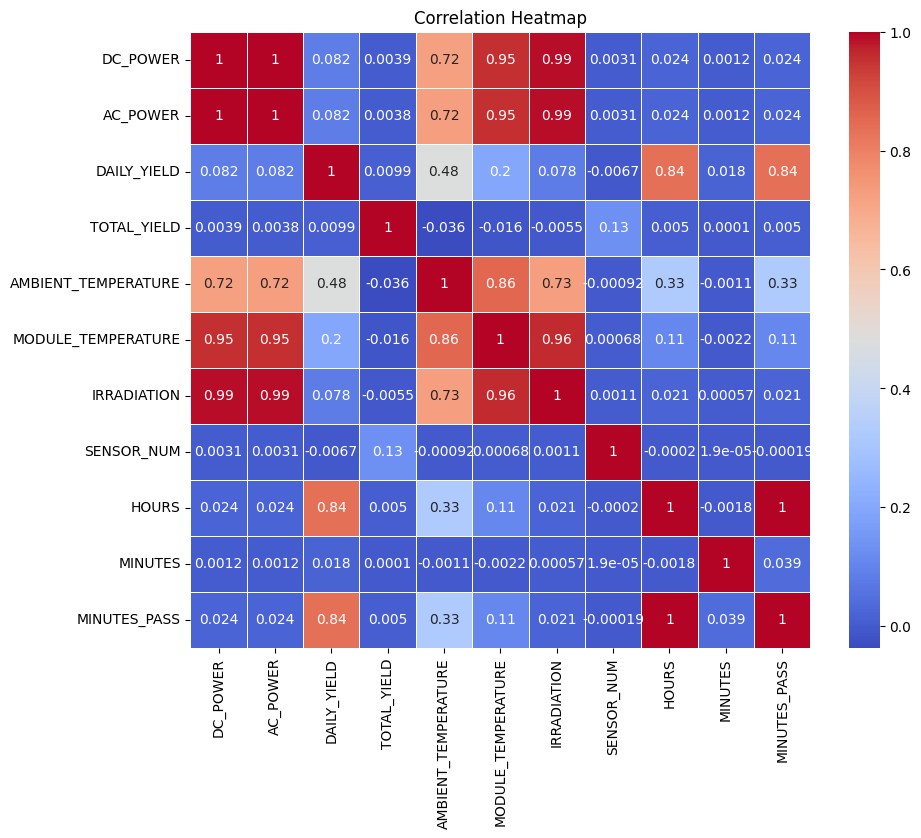

In [12]:
numeric_columns = df_plant1.select_dtypes(include=np.number).columns.tolist()
corr_df = df_plant1[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Daily Yield and AC Power chart

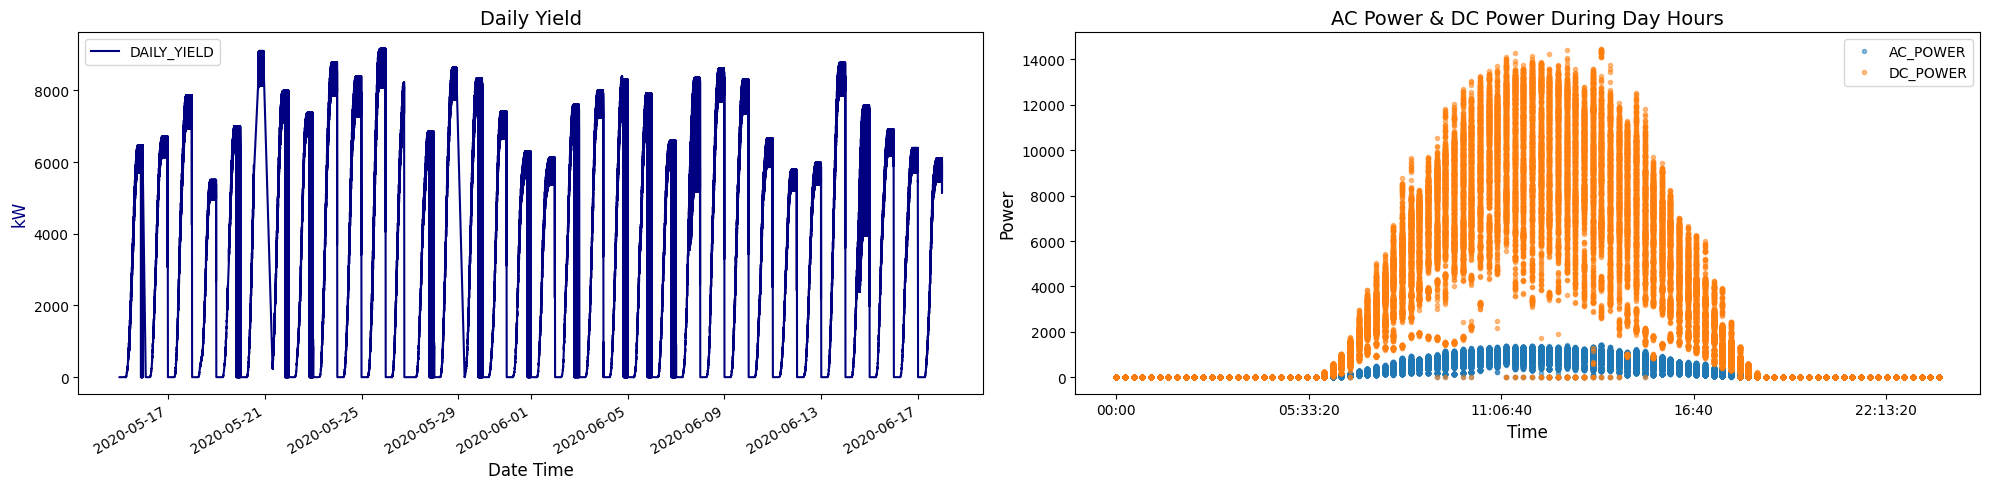

In [13]:
def plot_daily_yield_and_power(df_plant1):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 5), dpi=100)

    # Daily yield plot
    df_plant1.plot(x='DATE_TIME', y='DAILY_YIELD', color='navy', ax=ax1)
    ax1.set_title('Daily Yield', fontsize=14)
    ax1.set_ylabel('kW', color='navy', fontsize=12)
    ax1.set_xlabel('Date Time', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=10)

    # AC & DC power plot
    power_data = df_plant1.set_index('TIME')[['AC_POWER', 'DC_POWER']]
    power_data.plot(style='.', ax=ax2, alpha=0.5)
    ax2.set_title('AC Power & DC Power During Day Hours', fontsize=14)
    ax2.set_ylabel('Power', fontsize=12)
    ax2.set_xlabel('Time', fontsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.legend(fontsize=10)

    plt.tight_layout()
    plt.show()

plot_daily_yield_and_power(df_plant1)

### Daily and Total Yield chart

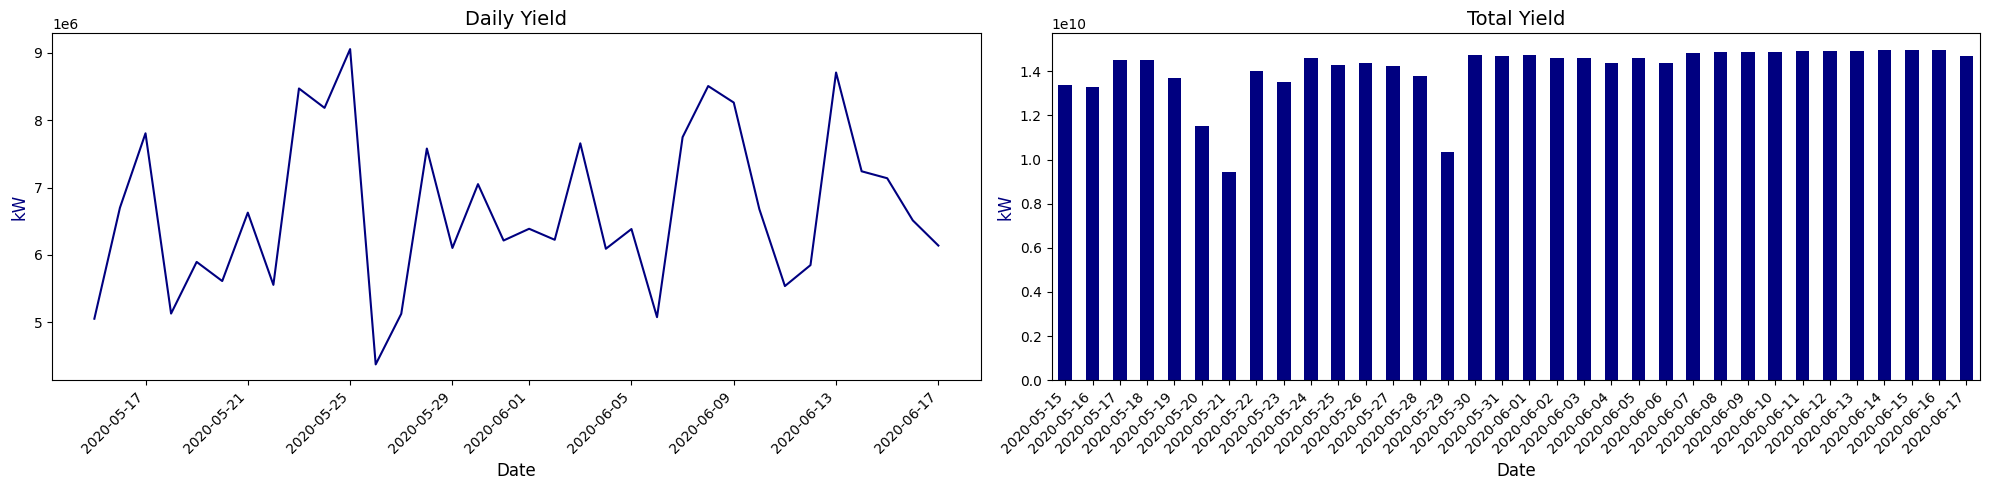

In [14]:
def plot_daily_yield_and_total_yield(df_plant1):
    df_plant1['date'] = pd.to_datetime(df_plant1['DATE_TIME']).dt.date

    # Group by date and sum, exclude 'DATE_TIME' column from sum
    df_plant1_grouped = df_plant1.groupby('date').sum(numeric_only=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5), dpi=100)

    # Plot Daily Yield
    df_plant1_grouped['DAILY_YIELD'].plot(ax=ax1, color='navy')
    ax1.set_title('Daily Yield', fontsize=14)
    ax1.set_ylabel('kW', color='navy', fontsize=12)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=10)

    # Plot Total Yield
    df_plant1_grouped['TOTAL_YIELD'].plot(kind='bar', ax=ax2, color='navy')
    ax2.set_title('Total Yield', fontsize=14)
    ax2.set_ylabel('kW', color='navy', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    fig.autofmt_xdate(rotation=45)
    plt.tight_layout()
    plt.show()

plot_daily_yield_and_total_yield(df_plant1)

### Irradiation, Ambient and Module Temperature chart

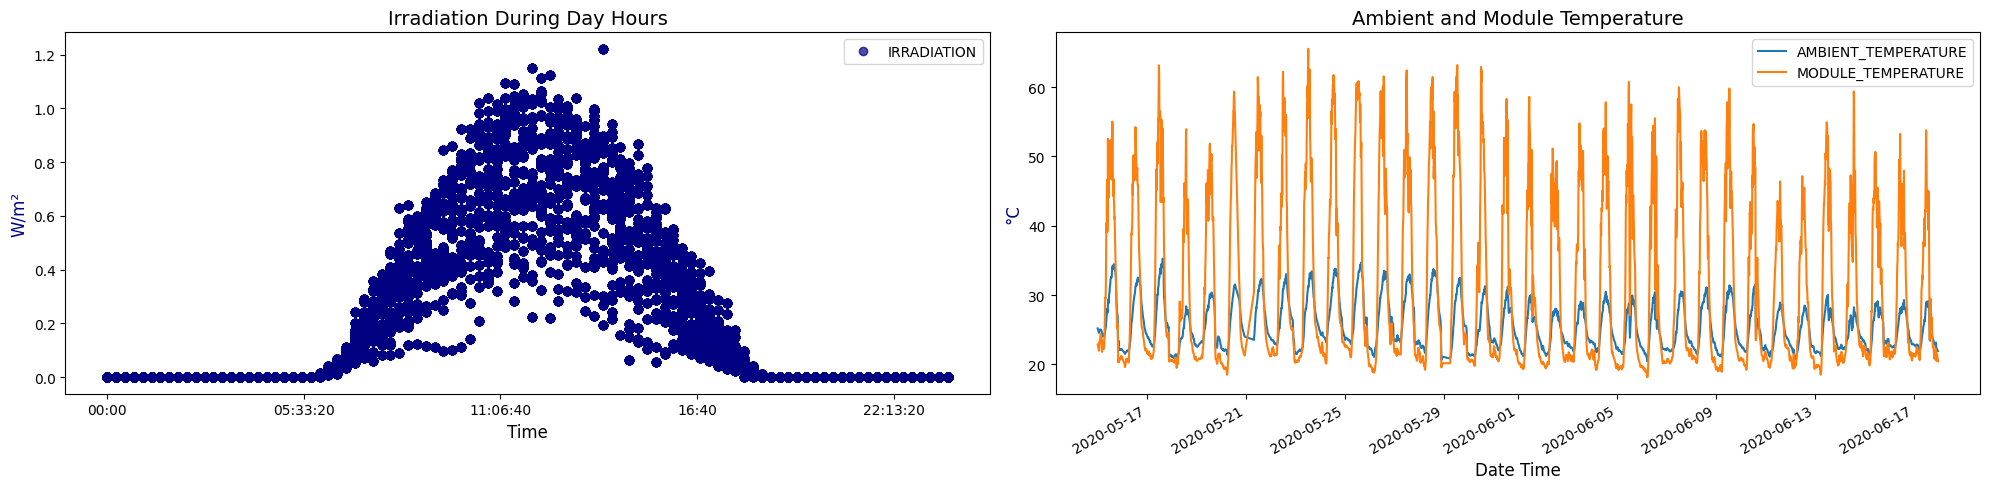

In [15]:
def plot_irradiation_and_temperature(df_plant1):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 5), dpi=100)

    df_plant1.plot(x='TIME', y='IRRADIATION', ax=ax1, style='o', color='navy', alpha=0.7)
    ax1.set_title('Irradiation During Day Hours', fontsize=14)
    ax1.set_ylabel('W/m²', color='navy', fontsize=12)
    ax1.set_xlabel('Time', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=10)

    df_plant1.set_index('DATE_TIME')[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].plot(ax=ax2)
    ax2.set_title('Ambient and Module Temperature', fontsize=14)
    ax2.set_ylabel('°C', color='navy', fontsize=12)
    ax2.set_xlabel('Date Time', fontsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.legend(fontsize=10)

    plt.tight_layout()
    plt.show()

plot_irradiation_and_temperature(df_plant1)

### Temperature Profile

In [16]:
df_plant1['AMBIENT_TEMPERATURE'].describe()

,AMBIENT_TEMPERATURE
count,68774.000000
mean,25.558521
std,3.361300
min,20.398505
25%,22.724491
50%,24.670178
75%,27.960429
max,35.252486


In [17]:
df_plant1['MODULE_TEMPERATURE'].describe()

,MODULE_TEMPERATURE
count,68774.000000
mean,31.244997
std,12.308283
min,18.140415
25%,21.123944
50%,24.818984
75%,41.693659
max,65.545714


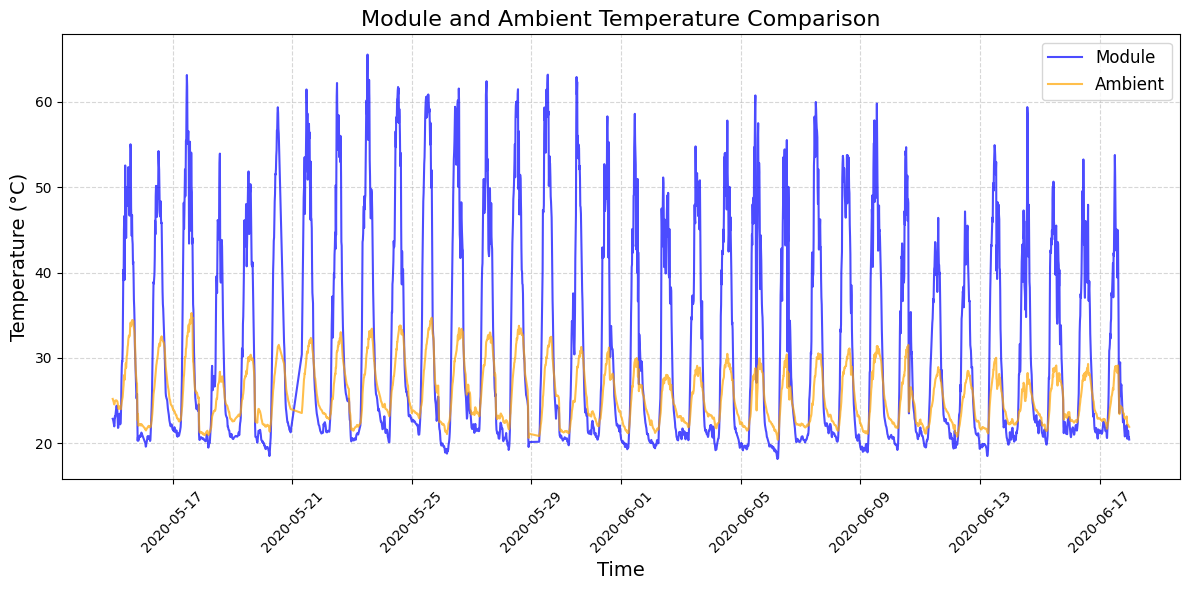

In [18]:
import matplotlib.pyplot as plt

def plot_temperature(df_plant1):
    plt.figure(figsize=(12, 6))
    plt.plot(df_plant1['DATE_TIME'], df_plant1['MODULE_TEMPERATURE'], label="Module", color='blue', linestyle='-', alpha=0.7)
    plt.plot(df_plant1['DATE_TIME'], df_plant1['AMBIENT_TEMPERATURE'], label="Ambient", color='orange', linestyle='-',  alpha=0.7)
    plt.title("Module and Ambient Temperature Comparison", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Temperature (°C)", fontsize=14)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_temperature(df_plant1)

### LSTM




In [19]:
df = gen_1.copy()
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [20]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')

df.set_index('DATE_TIME', inplace=True)

df_resampled = df.resample('15T').sum()

In [21]:
df_resampled['DAILY_YIELD_MW'] = df_resampled['DAILY_YIELD']/1000
df_resampled.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAILY_YIELD_MW
DATE_TIME,,,,,,,
2020-05-15 00:00:00,86835021,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,0.0,0.0,0.0,143581676.0,0.0
2020-05-15 00:15:00,86835021,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,0.0,0.0,0.0,143581676.0,0.0
2020-05-15 00:30:00,86835021,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,0.0,0.0,0.0,143581676.0,0.0
2020-05-15 00:45:00,86835021,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,0.0,0.0,0.0,143581676.0,0.0
2020-05-15 01:00:00,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,0.0,0.0,0.0,150761642.0,0.0


In [22]:
daily_yield = df_resampled['DAILY_YIELD_MW']
daily_yield.head(20)
daily_yield.shape

(3264,)

In [23]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 5
X, y = df_to_X_y(daily_yield, WINDOW_SIZE)
X.shape, y.shape

((3259, 5, 1), (3259,))

In [24]:
# making a train and test dataset to train the model

X_train, y_train  = X[:2600], y[:2600]
X_val, y_val  = X[2600:2900], y[2600:2900]
X_test, y_test  = X[2900:], y[2900:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2600, 5, 1) (2600,)
(300, 5, 1) (300,)
(359, 5, 1) (359,)


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Dense, Dropout,
    BatchNormalization, concatenate,
    Conv1D, MaxPooling1D, Flatten, Bidirectional
)
from tensorflow.keras.regularizers import l2

# Input Layer
inputs = Input(shape=(10, 1))  # Increased sequence length for complexity

# --- Branch 1: Stacked Bidirectional LSTMs ---
x1 = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))(inputs)
x1 = Dropout(0.3)(x1)
x1 = BatchNormalization()(x1)
x1 = Bidirectional(LSTM(64, return_sequences=True, recurrent_dropout=0.2))(x1)
x1 = Dropout(0.3)(x1)

# --- Branch 2: 1D Convolutions for local pattern extraction ---
x2 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
x2 = MaxPooling1D(pool_size=2)(x2)
x2 = Conv1D(32, kernel_size=2, activation='relu')(x2)
x2 = Flatten()(x2)

# --- Merge Branches ---
merged = concatenate([x1[:, -1, :], x2])  # Take last LSTM step and merge with CNN features

# --- Deep Dense Network ---
x = Dense(128, activation='relu')(merged)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output Layer
outputs = Dense(1, activation='linear')(x)

model1 = Model(inputs=inputs, outputs=outputs)
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 10, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 10, 256)        │        133,120 │ input_layer_1[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 10, 256)        │              0 │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 10, 256)        │          1,024 │ dropout[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 10, 64)         │            256 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 10, 128)        │        164,352 │ batch_normalization[0… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 5, 64)          │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 10, 128)        │              0 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 4, 32)          │          4,128 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 128)            │              0 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 128)            │              0 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256)            │              0 │ get_item[0][0],        │
│                           │                        │                │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         32,896 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128)            │            512 │ dropout_2[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ batch_normalization_1… │
├──────────────────────

 Total params: 346,657 (1.32 MB)

 Trainable params: 345,889 (1.32 MB)

 Non-trainable params: 768 (3.00 KB)

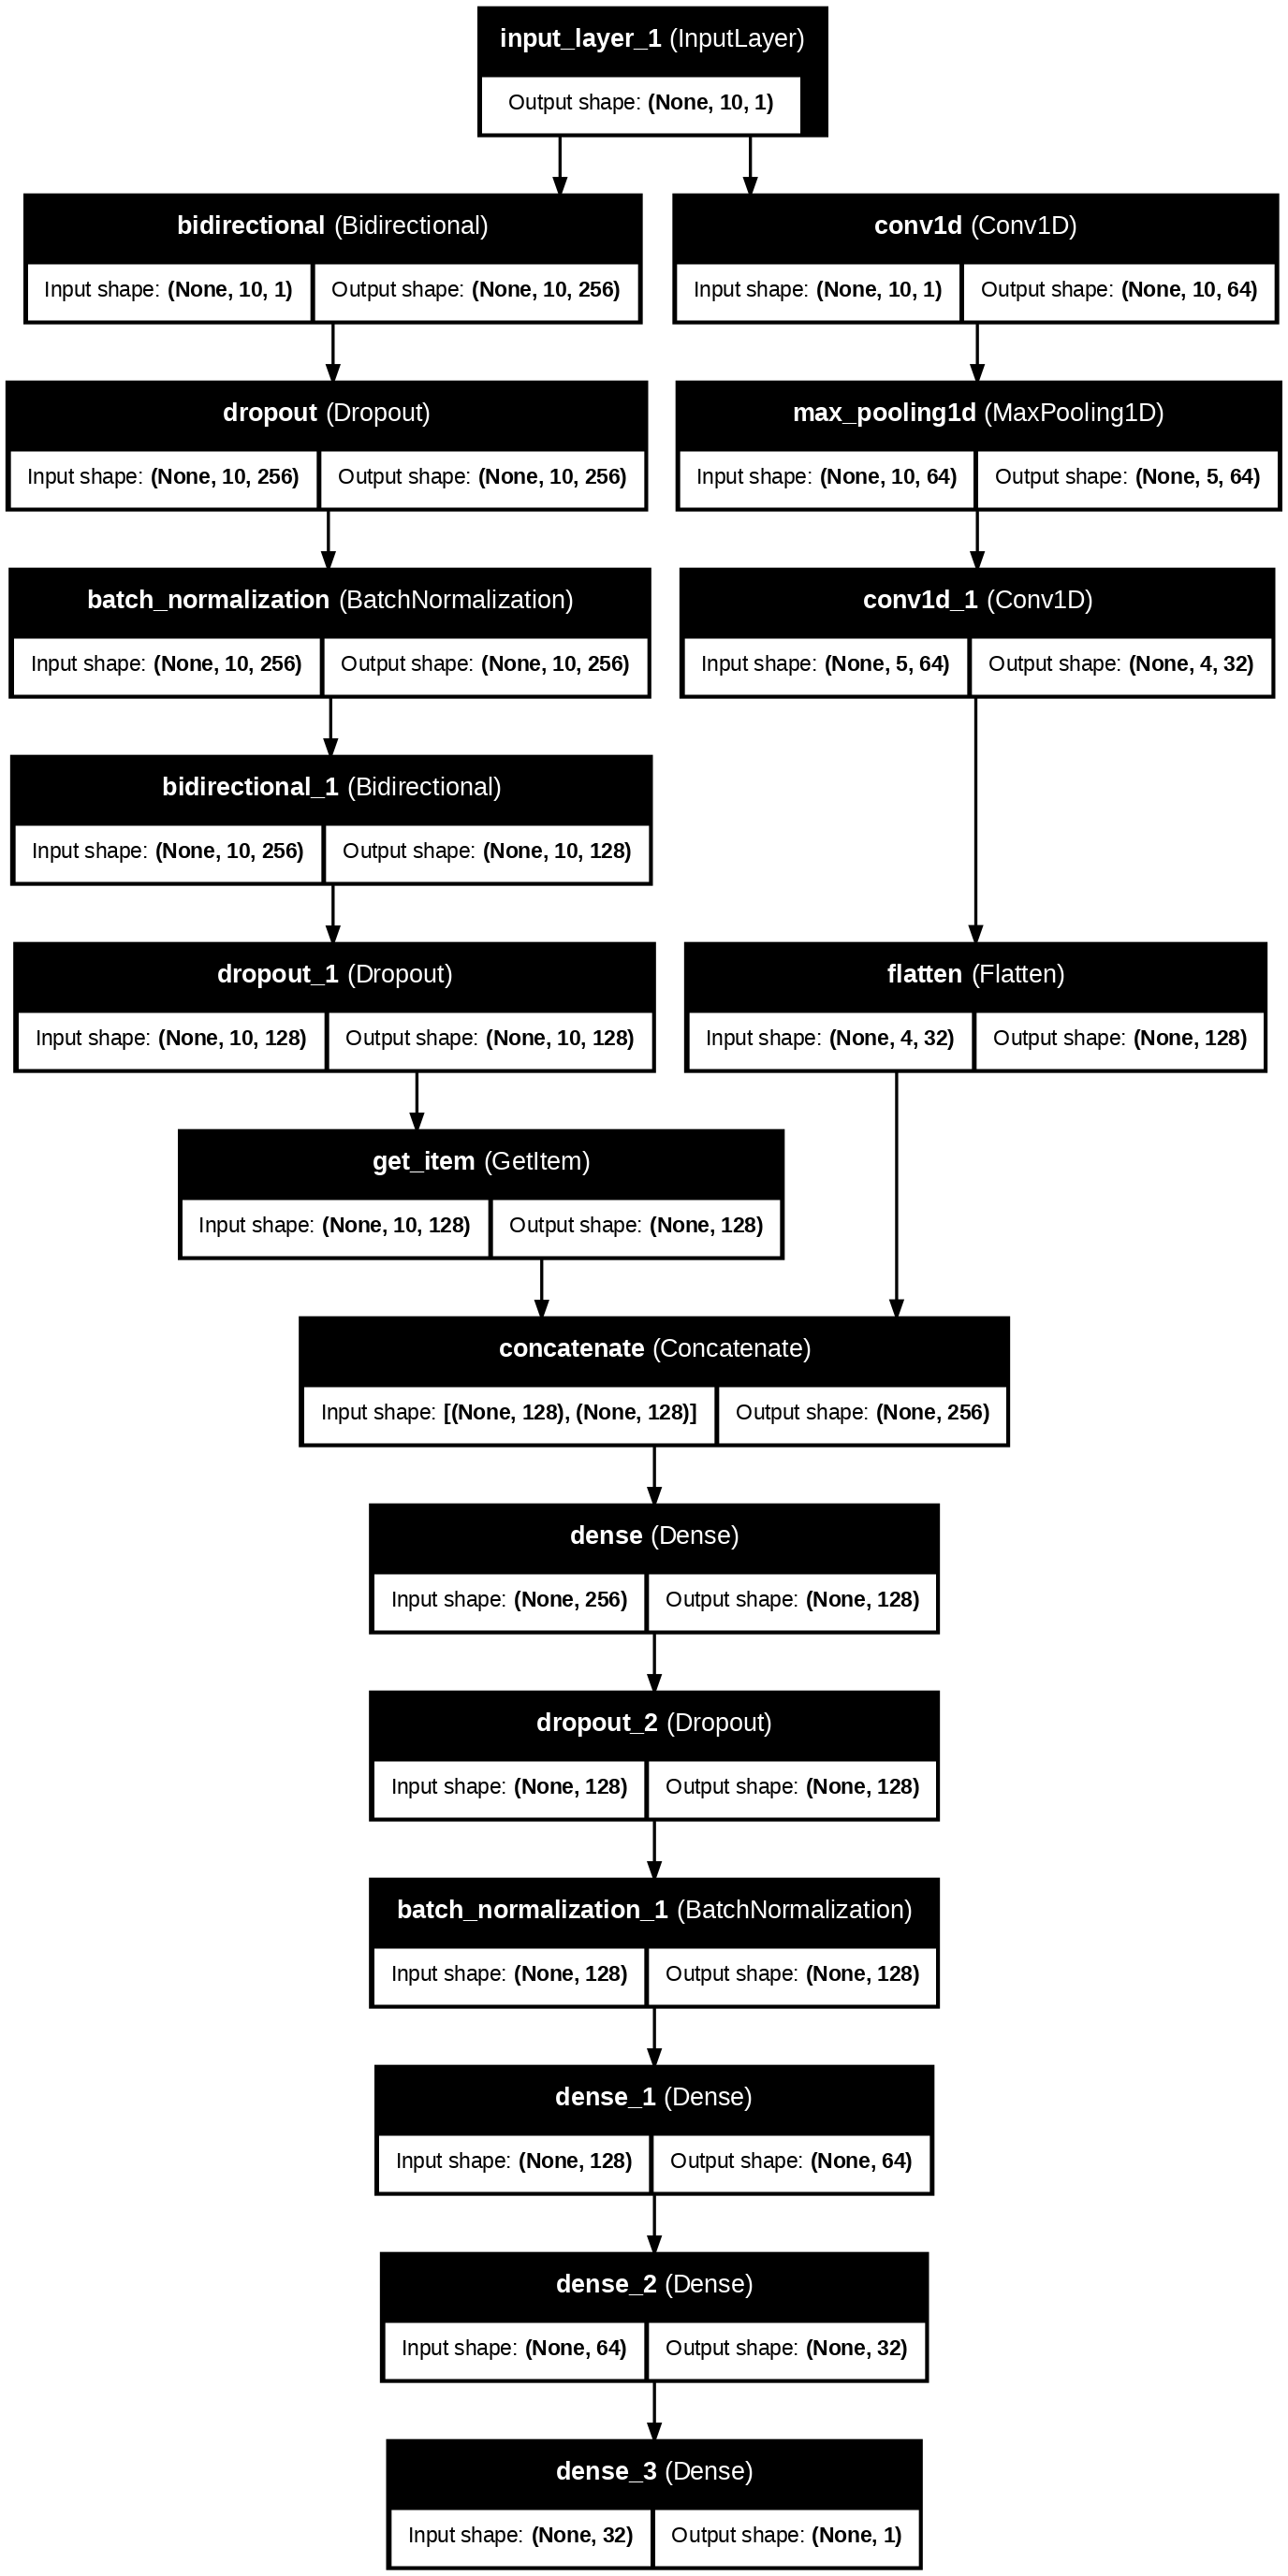

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(
    model1,
    to_file='deep_lstm_cnn_model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Top-to-Bottom (Tall diagram)
    dpi=120,       # Higher resolution
    expand_nested=False
)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Define the model checkpoint callback
# Save the best model based on validation loss (lowest RMSE)
cp = ModelCheckpoint(
    filepath='model1/best_model.keras',  # Use .h5 extension for model saving
    monitor='val_root_mean_squared_error',  # Monitor validation RMSE
    save_best_only=True,
    save_weights_only=False,  # Save full model instead of just weights
    verbose=1  # Print out saving messages
)

# Add early stopping to stop training if the model stops improving
es = EarlyStopping(
    monitor='val_root_mean_squared_error',  # Stop if RMSE doesn't improve
    patience=10,  # Wait 10 epochs before stopping
    restore_best_weights=True,  # Restore the best weights after stopping
    verbose=1
)

# Compile the model
# Lower learning rate is set to help the optimizer converge more smoothly
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=1e-4),  # 0.0001 is written as 1e-4 for clarity
    metrics=[RootMeanSquaredError()]  # RMSE metric for model evaluation
)

In [29]:
# Fit the model with better structure, additional callbacks, and dynamic batch size
model1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),  # Provide validation data for real-time evaluation
    epochs=75,  # Increase epochs for a more robust model, can be adjusted later
    batch_size=32,  # Use a moderate batch size (adjust based on your hardware)
    callbacks=[cp, es],  # Include EarlyStopping for better convergence
    verbose=1  # Show training progress
)

Epoch 1/75


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 10, 1), found shape=(None, 5)

In [ ]:
# ipython-input-24-46adbf7228f5
# making a train and test dataset to train the model

WINDOW_SIZE = 10  # Change WINDOW_SIZE to 10 to match the model's input shape
X, y = df_to_X_y(daily_yield, WINDOW_SIZE)  # Regenerate X and y with the new window size


X_train, y_train = X[:2600], y[:2600]
X_val, y_val = X[2600:2900], y[2600:2900]
X_test, y_test = X[2900:], y[2900:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

rlr = ReduceLROnPlateau(
    monitor='val_root_mean_squared_error',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

model1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=75,
    batch_size=32,
    callbacks=[cp, es, rlr],
    verbose=1
)

Epoch 1/75
77/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1240.0310 - root_mean_squared_error: 35.1990
Epoch 1: val_root_mean_squared_error improved from 29.23567 to 28.62391, saving model to model1/best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1239.4474 - root_mean_squared_error: 35.1918 - val_loss: 819.3281 - val_root_mean_squared_error: 28.6239 - learning_rate: 1.0000e-04
Epoch 2/75
77/82 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1211.1117 - root_mean_squared_error: 34.7851
Epoch 2: val_root_mean_squared_error improved from 28.62391 to 28.09970, saving model to model1/best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1210.1514 - root_mean_squared_error: 34.7724 - val_loss: 789.5932 - val_root_mean_squared_error: 28.0997 - learning_rate: 1.0000e-04
Epoch 3/75
77/82 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1223.2351 - root_mean_squared_error: 34.9670
Epoch 3: val_root_mean_squared_error improved from 28.09970 to 27.57792, saving model to model1/best_mod

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
cp = ModelCheckpoint(filepath='model1/best_model.keras', monitor='val_root_mean_squared_error', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_root_mean_squared_error', patience=10, restore_best_weights=True, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_root_mean_squared_error', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Compile model
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=1e-4),
    metrics=[RootMeanSquaredError()]
)

# Fit model
model1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=75,
    batch_size=32,
    callbacks=[cp, es, rlr],
    verbose=1
)

Epoch 1/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 784.6832 - root_mean_squared_error: 27.7195
Epoch 1: val_root_mean_squared_error improved from inf to 14.37071, saving model to model1/best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 783.4047 - root_mean_squared_error: 27.6994 - val_loss: 206.5173 - val_root_mean_squared_error: 14.3707 - learning_rate: 1.0000e-04
Epoch 2/75
78/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 650.0243 - root_mean_squared_error: 25.4489
Epoch 2: val_root_mean_squared_error did not improve from 14.37071
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 649.8602 - root_mean_squared_error: 25.4485 - val_loss: 209.2099 - val_root_mean_squared_error: 14.4641 - learning_rate: 1.0000e-04
Epoch 3/75
76/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 680.1090 - root_mean_squared_error: 26.0574
Epoch 3: val_root_mean_squared_error did not improve from 14.37071
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 678.0248 - root_mean_squared_error: 26.0189 - v

In [39]:
from tensorflow.keras.models import load_model

# Load the best saved model
model1 = load_model('model1/best_model.keras')
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,877 (54.21 KB)

 Trainable params: 4,625 (18.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,252 (36.14 KB)

#### TRAIN DATASET


In [40]:
# Make predictions on the training data
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame({
    'Train Predictions': train_predictions,
    'Actual Values': y_train.flatten()
})

train_results.head()

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actual Values
0,0.640876,0.0
1,0.640876,0.0
2,0.640876,0.0
3,0.640876,0.0
4,0.640876,0.0


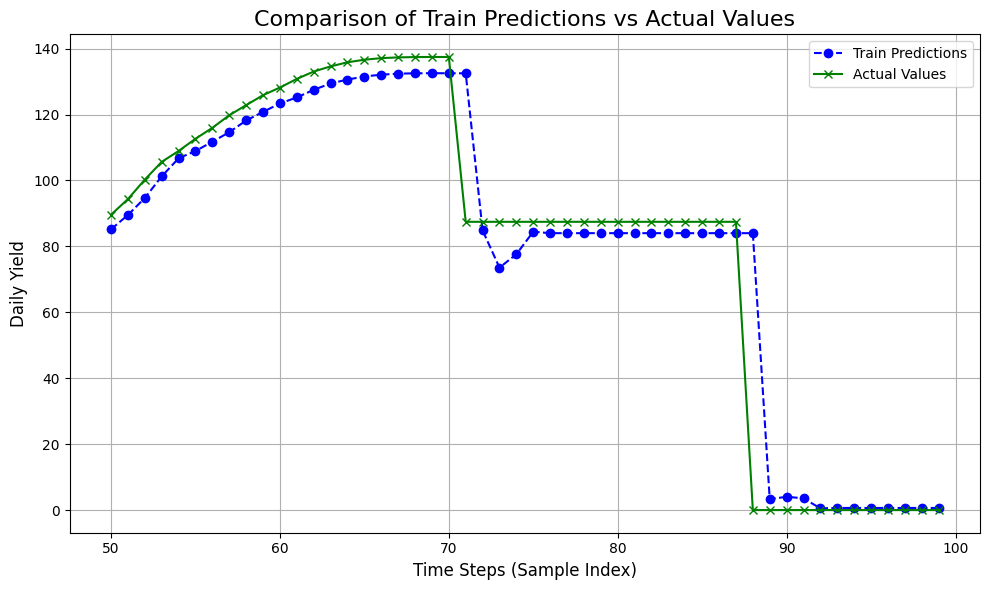

In [41]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Train Predictions and Actual Values
plt.plot(train_results['Train Predictions'][50:100], label='Train Predictions', color='blue', linestyle='--', marker='o')
plt.plot(train_results['Actual Values'][50:100], label='Actual Values', color='green', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Train Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### VALIDATION DATA

In [42]:

val_predictions = model1.predict(X_val).flatten()

# Create a DataFrame to compare predictions and actual values
val_results = pd.DataFrame({
    'Val Predictions': val_predictions,
    'Actual Values': y_val.flatten()
})

val_results.head()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Val Predictions,Actual Values
0,0.640876,0.0
1,0.640876,0.0
2,0.640876,0.0
3,0.640876,0.0
4,0.640876,0.0


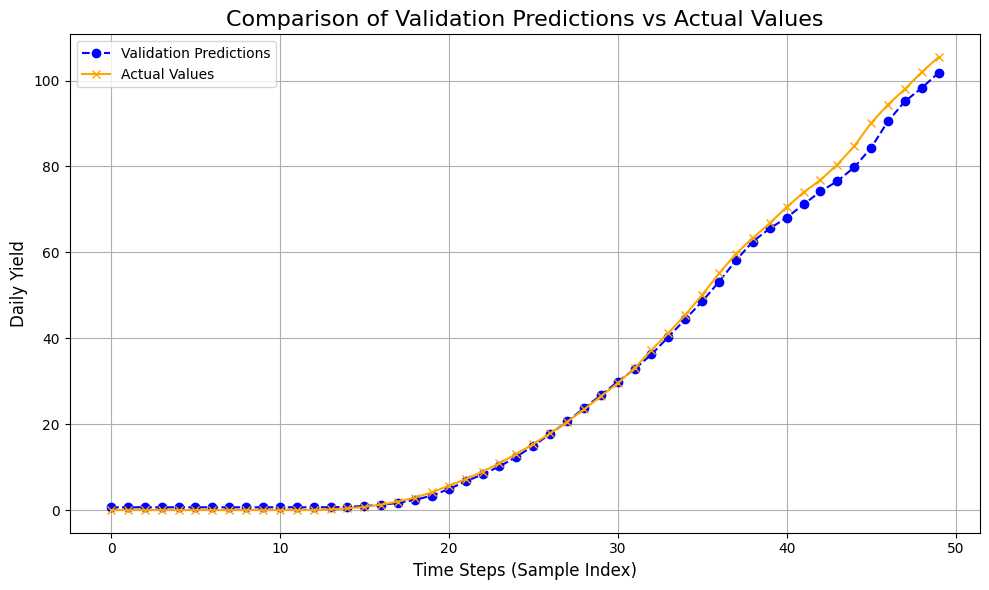

In [43]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Validation Predictions and Actual Values
plt.plot(val_results['Val Predictions'][:50], label='Validation Predictions', color='blue', linestyle='--', marker='o')
plt.plot(val_results['Actual Values'][:50], label='Actual Values', color='orange', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Validation Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### testing data

In [44]:
# Make predictions on the test data
test_predictions_1 = model1.predict(X_test).flatten()

# Create a DataFrame to compare predictions and actual values
test_results_1 = pd.DataFrame({
    'Test Predictions': test_predictions_1,
    'Actual Values': y_test.flatten()  # Ensure y_test is flattened for consistency
})

# Display the first few rows of the DataFrame
test_results_1.head()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Test Predictions,Actual Values
0,0.642509,0.094214
1,0.693906,0.350036
2,0.908906,0.829661
3,1.358309,1.565268
4,2.310845,3.003446


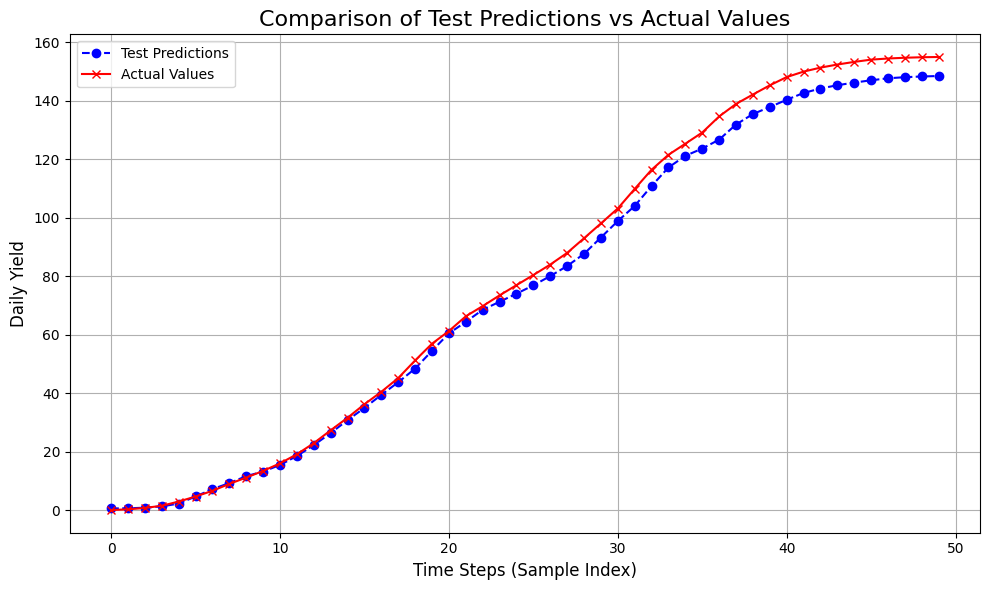

In [45]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Test Predictions and Actual Values
plt.plot(test_results_1['Test Predictions'][:50], label='Test Predictions', color='blue', linestyle='--', marker='o')
plt.plot(test_results_1['Actual Values'][:50], label='Actual Values', color='red', linestyle='-', marker='x')


plt.title('Comparison of Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 153.9179
Root Mean Squared Error (RMSE): 12.4064
Mean Absolute Error (MAE): 4.1500
R² Score: 0.9587


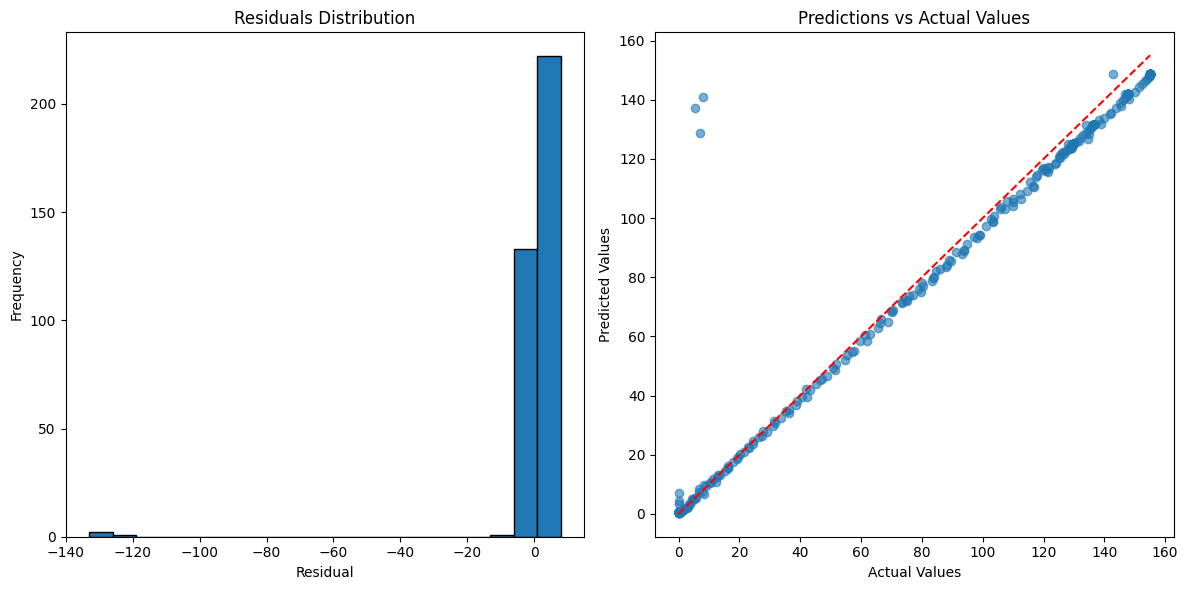

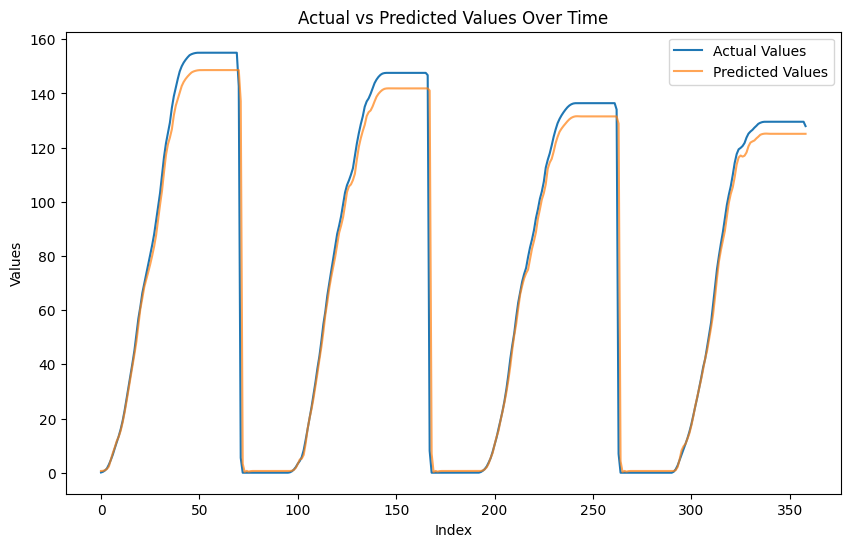

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

def evaluate_model_performance(y_true, y_pred):
    """
    Evaluates model performance by computing key metrics and generating visualizations.

    Parameters:
    y_true (array-like): Actual values
    y_pred (array-like): Predicted values

    Returns:
    dict: A dictionary containing calculated metrics (MSE, RMSE, MAE, R²)
    """

    # Flattening inputs if they are not 1D
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    # Calculating key metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Printing metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Residuals calculation
    residuals = y_true - y_pred

    # Plotting residuals distribution
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')

    # Plotting Predictions vs Actual Values
    plt.subplot(1, 2, 2)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.title('Predictions vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Ideal line

    plt.tight_layout()
    plt.show()

    # Plotting actual vs predicted over time (for time series or sequential data)
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual Values')
    plt.plot(y_pred, label='Predicted Values', alpha=0.7)
    plt.title('Actual vs Predicted Values Over Time')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

    # Returning a dictionary of computed metrics
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

    return metrics

train_metrics_model1 = evaluate_model_performance(y_test, test_predictions_1)